<a href="https://colab.research.google.com/github/1kr1st1na1/diplomaAHP/blob/main/AHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title ПОДКЛЮЧЕНИЕ К GDRIVE И GSHEET
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/CW3y'))
from google.auth import default
creds, _ = default()
gs = gspread.authorize(creds)


import time
print('\nРаботаем с таблицей')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/CW3y/
os.stat('/content/drive/MyDrive/Colab Notebooks/CW3y/CW_SH.gsheet')
table = gs.open_by_key('1bsDTq-rsJxms25tELEUff5pIiwUUjy4GvK44469lS5g')
print(dir(table))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'sample_data']
['.file-revisions-by-id', '.shortcut-targets-by-id', 'MyDrive', '.Trash-0']
['CW_SH.gsheet']

Работаем с таблицей
total 1
-rw------- 1 root 172 Apr 12  2023 CW_SH.gsheet
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_properties', '_spreadsheets_get', '_spreadsheets_sheets_copy_to', 'accept_ownership', 'add_worksheet', 'batch_update', 'client', 'creationTime', 'del_worksheet', 'del_worksheet_by_id', 'duplicate_sheet', 'export', 'fetch_sheet_metadata', 'get_lastUpdateTime', 'get_worksheet', 'get_worksheet_by_id

In [ ]:
#@title GETTING TEMPLATE SHEET
worksheet = table.get_worksheet(0)

In [ ]:
#@title CREATING A NEW WORKSHEET (FROM A TEMPLATE)
new_WS_name = "example2505" #@param {type: "string"}
index_to_put_the_sheet = "2" #@param [1,2,3,4,5,6,7,8,9,10]
table.get_worksheet(0).duplicate(index_to_put_the_sheet, None, new_WS_name)
worksheet = table.get_worksheet(int(index_to_put_the_sheet))

In [ ]:
#@title КРИТЕРИИ И ИХ ВАЖНОСТЬ

num_param =int(input("Укажите количество критериев для решения задачи МАИ: "))

col_name = 3
for n in range(0,num_param):
  param_name = input("Название нового критерия: ")
  param_value = input("Важность нового критерия(0-10): ")
  worksheet.update_cell(2,col_name, param_name)
  worksheet.update_cell(3,col_name, param_value)
  col_name += 3


Укажите количество критериев для решения задачи МАИ: 2
Название нового критерия: age
Важность нового критерия(0-10): 9
Название нового критерия: degree
Важность нового критерия(0-10): 10


In [ ]:

# Output in high quality.
%config InlineBackend.figure_format='retina'


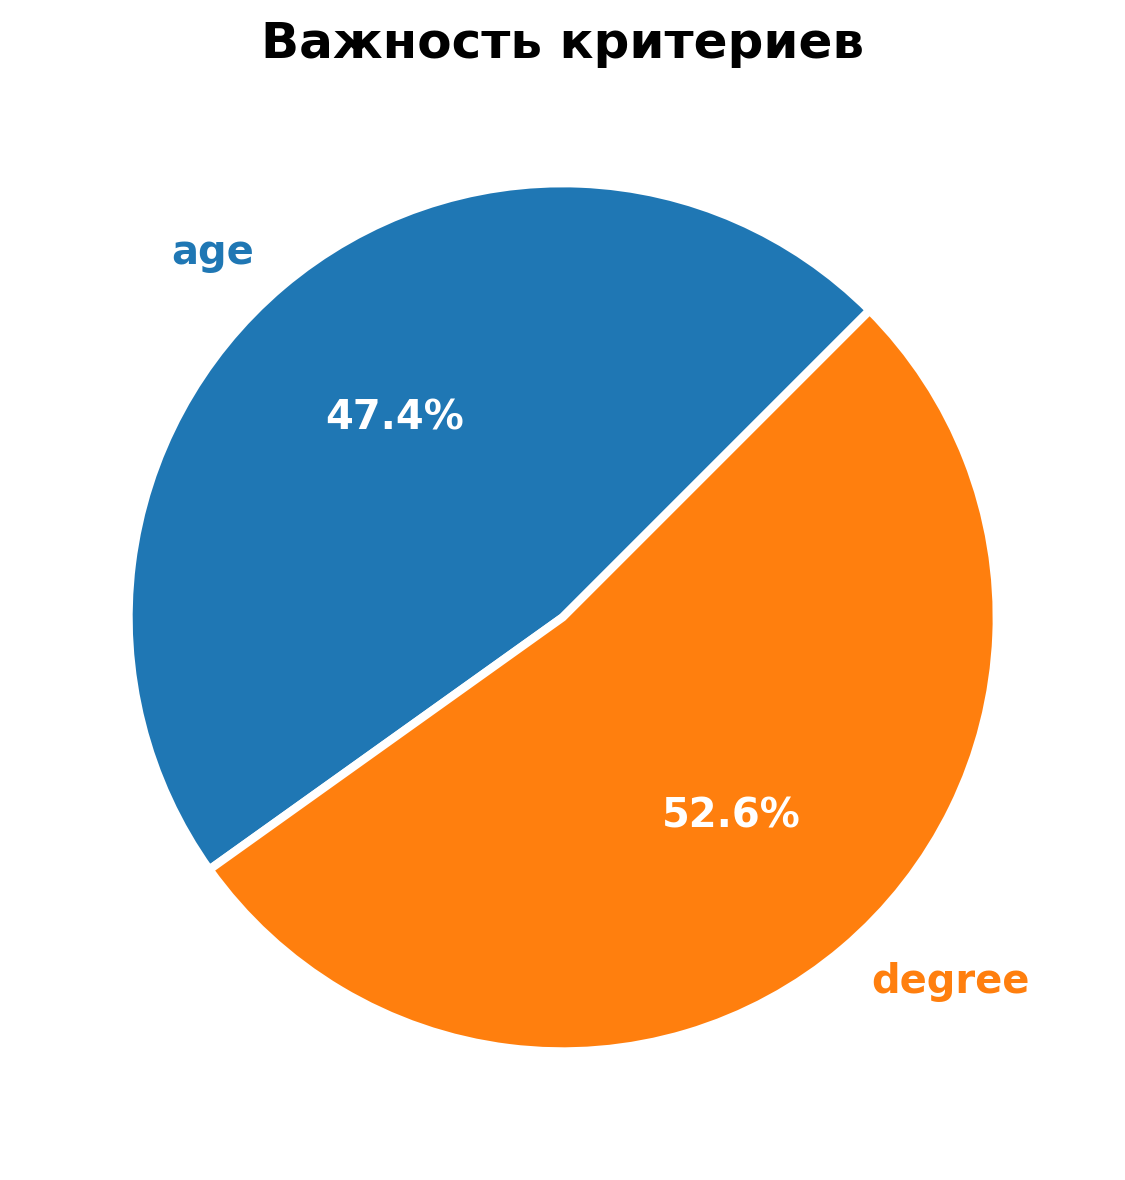

In [ ]:
#@title PIE Важность критериев
import matplotlib.pyplot as plt
cr_pie = []
st_col = 3
for i in range(num_param):
  cr_pie.append(float(worksheet.cell(4, st_col).value) * 100)
  st_col += 3
labels = []
lab_col = 3
for l in range(num_param):
  labels.append(worksheet.cell(2, lab_col).value)
  lab_col += 3

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cr_pie, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=45)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Важность критериев', fontsize=18, fontweight='bold')
plt.tight_layout()

In [ ]:
#@title АЛЬТЕРНАТИВЫ И СТЕПЕНИ ВЛАДЕНИЯ ИМИ

num_opt =int(input("Укажите количество альтернатив для решения задачи МАИ: "))
row_opt = 6

for n in range(0,num_opt):
  col_ab = 3
  print("--------------------------------------------------------")
  opt_name = input("Название новой альтернативы ")
  worksheet.update_cell(row_opt,1, opt_name)
  for p in range(num_param):
    print("Владение",worksheet.cell(2,col_ab ).value , " критерием: ")
    ab_value = input()
    worksheet.update_cell(row_opt,col_ab, ab_value)
    col_ab += 3
  row_opt += 1

Укажите количество альтернатив для решения задачи МАИ: 3
--------------------------------------------------------
Название новой альтернативы Аня
Владение age  критерием: 
6
Владение degree  критерием: 
5
--------------------------------------------------------
Название новой альтернативы Ваня
Владение age  критерием: 
2
Владение degree  критерием: 
10
--------------------------------------------------------
Название новой альтернативы Катя
Владение age  критерием: 
9
Владение degree  критерием: 
1


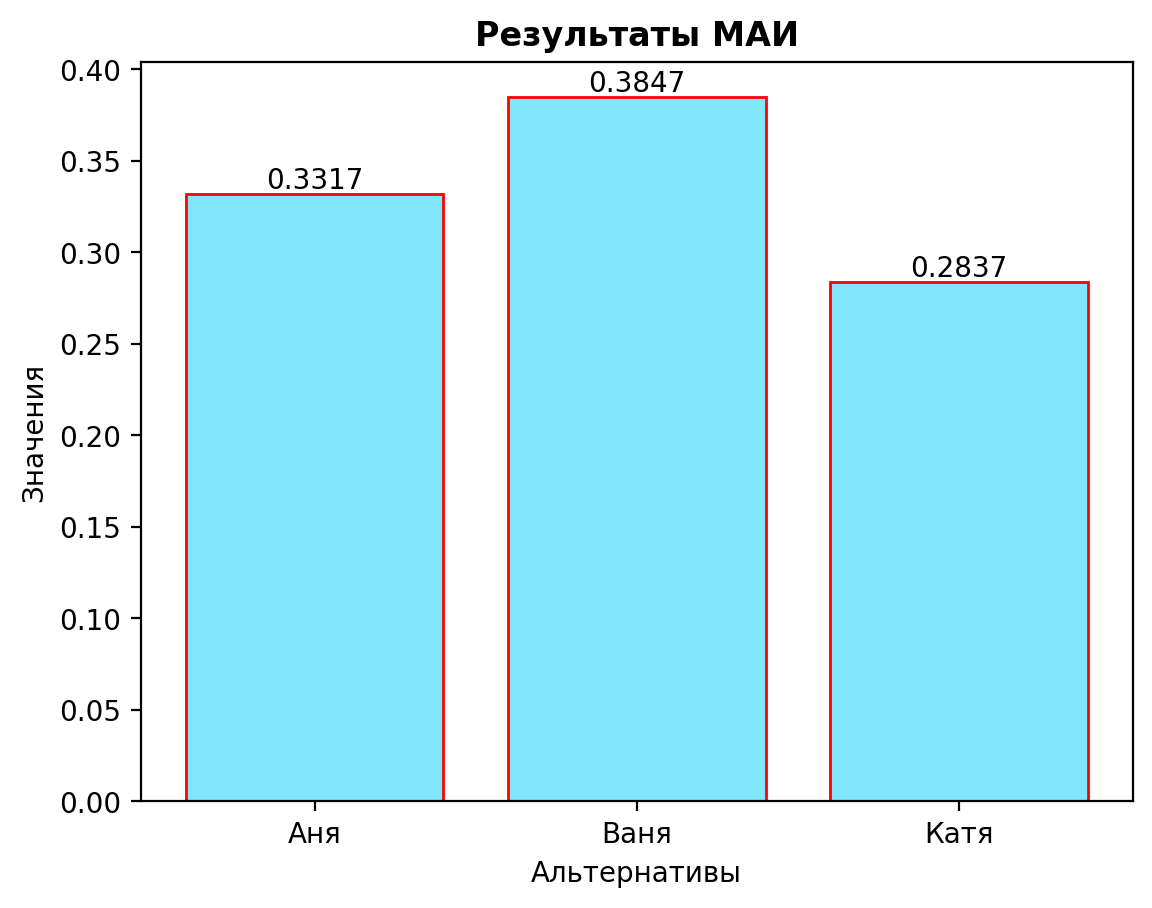

In [ ]:
#@title РЕЗУЛЬТАТЫ СТОЛБЧАТАЯ ДИАГРАММА
import matplotlib.pyplot as plt
alt_arr = []
st_row = 6
for i in range(num_opt):
  alt_arr.append(worksheet.cell(st_row, 1).value)
  st_row += 1

alt_res = []
res_row = 6
for l in range(num_opt):
  alt_res.append(round(float(worksheet.cell(res_row, 2).value),4))
  res_row += 1

plt.bar(alt_arr, alt_res, color=(0.49, 0.9, 0.99, 0.99), edgecolor='red')

plt.title("Результаты МАИ",fontweight='bold' )
plt.xlabel("Альтернативы")
plt.ylabel("Значения")


for k in range(len(alt_res)):
    plt.annotate(str(alt_res[k]), xy=(alt_arr[k],alt_res[k]), ha='center', va='bottom')

plt.show()

In [ ]:
#@title etc.
#%tensorboard --logdir logs